In [1]:
library('readr')
library('magrittr')
library('dplyr')
library('tidyr')
library('ggplot2')


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘tidyr’

The following object is masked from ‘package:magrittr’:

    extract



In [2]:
d7_titration <-
    read_tsv(
        'd7-cell-titration-data.tsv',
        col_types=cols(
            `Row`=col_factor(levels=c(LETTERS[1:8])),
            .default=col_double()
        )
    ) %>%
    gather(
        key="Column",
        value="A570-A595",
        `C1`:`C12`,
        factor_key=TRUE
    ) %>%
    group_by(`Column`) %>%
    summarize(
        `Abs_mean`=mean(`A570-A595`),
        `Abs_sd`=sd(`A570-A595`)
    ) %>%
    mutate(
        `Cell_count`=1e6 / (2 ^ (as.integer(`Column`) - 1))
    )

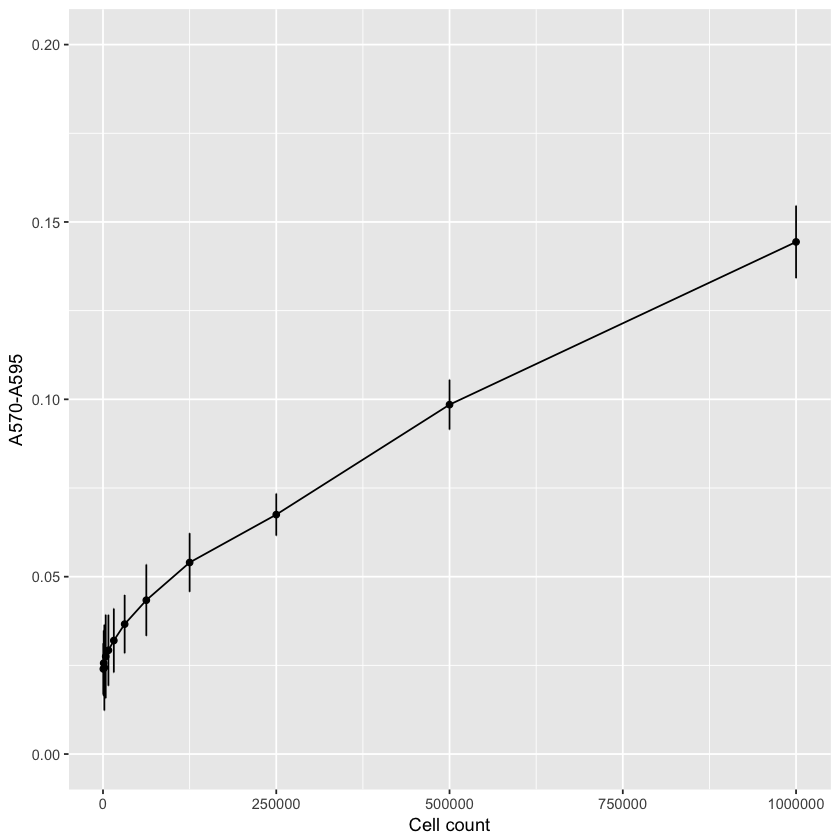

In [3]:
d7_titration %>%
    ggplot(aes(x=`Cell_count`, y=`Abs_mean`, group=1)) +
        geom_point() +
        geom_line() +
        geom_errorbar(
            aes(ymin=`Abs_mean`-`Abs_sd`, ymax=`Abs_mean`+`Abs_sd`),
        ) +
        ylim(0, .2) +
        ylab('A570-A595') +
        xlab('Cell count')

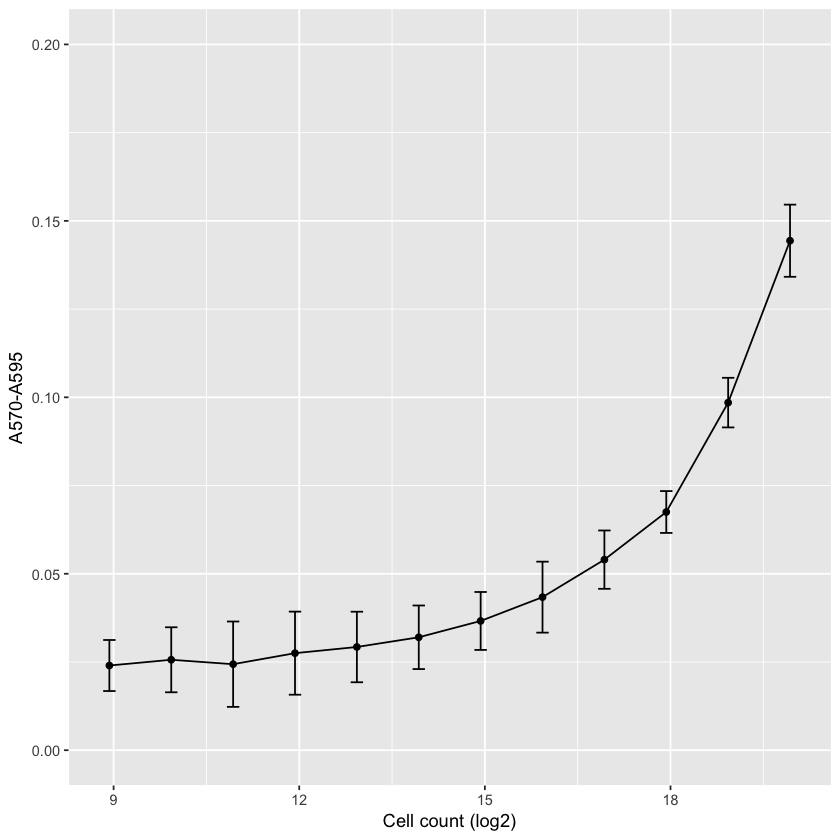

In [4]:
d7_titration %>%
    ggplot(aes(x=log2(`Cell_count`), y=`Abs_mean`, group=1)) +
        geom_point() +
        geom_line() +
        geom_errorbar(
            aes(ymin=`Abs_mean`-`Abs_sd`, ymax=`Abs_mean`+`Abs_sd`),
            width=.2
        ) +
        ylim(0, .2) +
        ylab('A570-A595') +
        xlab('Cell count (log2)')